In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,Activation,MaxPooling2D,BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Reshape, SimpleRNN
from tensorflow.keras.layers import LSTM

In [6]:
path = '/Users/mohammadmujahidnadeem/Downloads/New/images'

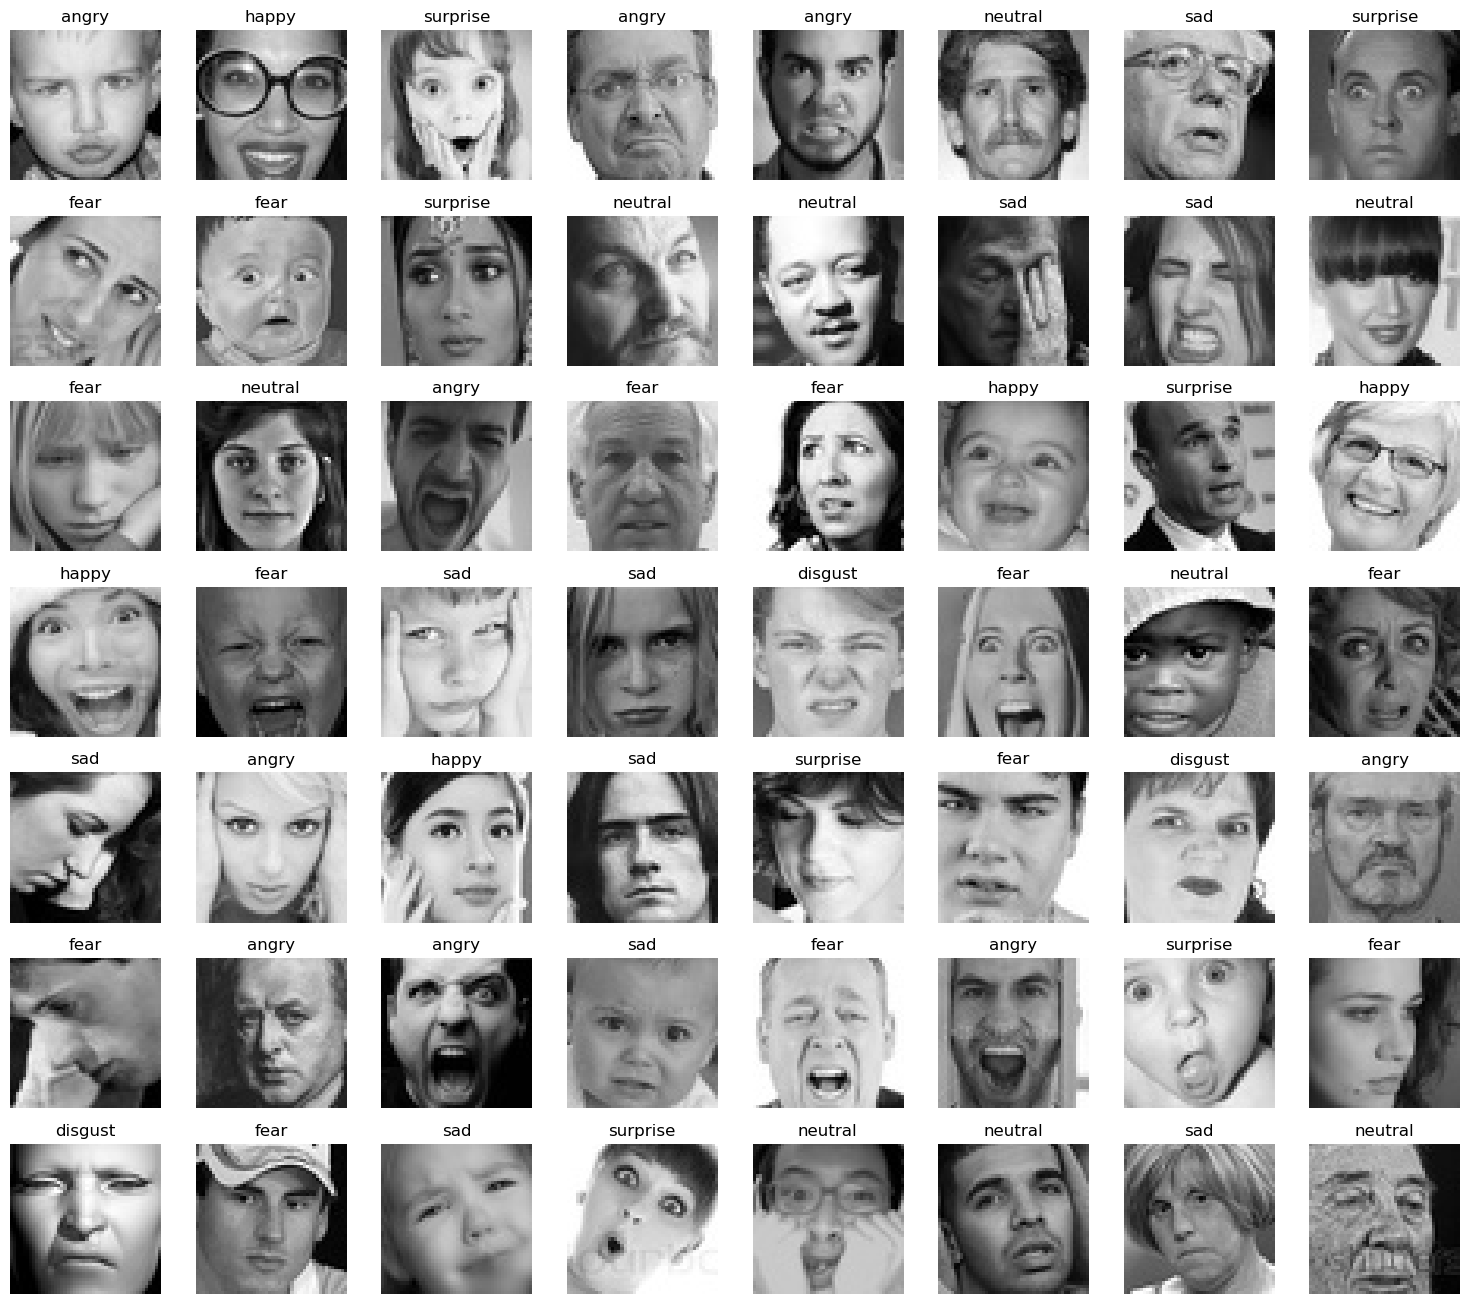

In [19]:
import random
expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
random.shuffle(expressions)
plt.figure(figsize=(15, 15))
index = 1

for i in range(1,57):
    expression = random.choice(expressions)
    image_path = os.path.join(path, 'train', expression)
    image_files = os.listdir(image_path)
    random.shuffle(image_files)
    image = load_img(os.path.join(image_path, image_files[i]), target_size=(48, 48))
    plt.subplot(8, 8, index)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    index += 1

plt.tight_layout()
plt.show()

In [6]:
batch_size = 128
train_datagenerator = ImageDataGenerator()
validation_datagenerator = ImageDataGenerator()
trainpath = '/Users/mohammadmujahidnadeem/Downloads/New/images/train'
validpath = '/Users/mohammadmujahidnadeem/Downloads/New/images/validation'
train_set = train_datagenerator.flow_from_directory(trainpath,
                                                   target_size=(48, 48), 
                                                   color_mode="grayscale",
                                                   class_mode="categorical", 
                                                   batch_size=batch_size, 
                                                   shuffle=True)
test_set = validation_datagenerator.flow_from_directory(validpath,
                                                       target_size=(48, 48), 
                                                       color_mode="grayscale",
                                                       class_mode="categorical", 
                                                       batch_size=batch_size, 
                                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64, (3,3), padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128, (5,5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Print the output shape
print(model.output_shape)  # Add this line in your code

# Reshape for RNN or LSTM
model.add(Reshape((9, 512)))  # Adjust based on the actual output shape

# Add RNN or LSTM layer
model.add(SimpleRNN(64, return_sequences=True))  # RNN layer with return_sequences
model.add(LSTM(64))                              # LSTM layer





#1st connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
          
#2nd connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


          
model.add(Dense(classes, activation='softmax'))
          
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

(None, 3, 3, 512)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24

In [8]:
model_checkpoint = ModelCheckpoint("./model.h5", 
                                   monitor="val_acc", 
                                   verbose=1, 
                                   save_best_only=True, 
                                   mode="max")

early_stop = EarlyStopping(monitor="val_loss",
                           min_delta=0,
                           patience=3,
                           verbose=1,
                           restore_best_weights=True)

reduce_learning_rate = ReduceLROnPlateau(monitor="val_loss", 
                                         factor=0.2, 
                                         patience=3, 
                                         verbose=1,
                                         min_delta=0.0001)

callbacks_list = [early_stop, model_checkpoint, reduce_learning_rate]
epochs = 5

In [9]:
history = model.fit(train_set, 
                    epochs=epochs, 
                    callbacks=callbacks_list, 
                    validation_data=test_set,
                    steps_per_epoch=train_set.n//train_set.batch_size, 
                    validation_steps=test_set.n//test_set.batch_size)

model.save("./emotion_detection_model.h5")

Epoch 1/5
225/225 [==============================] - 164s 725ms/step - loss: 2.0512 - accuracy: 0.2128 - val_loss: 1.8134 - val_accuracy: 0.2649 - lr: 1.0000e-04
Epoch 2/5
225/225 [==============================] - 170s 757ms/step - loss: 1.8634 - accuracy: 0.2737 - val_loss: 1.9004 - val_accuracy: 0.2786 - lr: 1.0000e-04
Epoch 3/5
225/225 [==============================] - 164s 729ms/step - loss: 1.7803 - accuracy: 0.3087 - val_loss: 1.7681 - val_accuracy: 0.3186 - lr: 1.0000e-04
Epoch 4/5
225/225 [==============================] - 165s 732ms/step - loss: 1.7201 - accuracy: 0.3361 - val_loss: 1.8960 - val_accuracy: 0.3287 - lr: 1.0000e-04
Epoch 5/5
225/225 [==============================] - 165s 736ms/step - loss: 1.6576 - accuracy: 0.3597 - val_loss: 1.9083 - val_accuracy: 0.3241 - lr: 1.0000e-04


/Users/mohammadmujahidnadeem/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


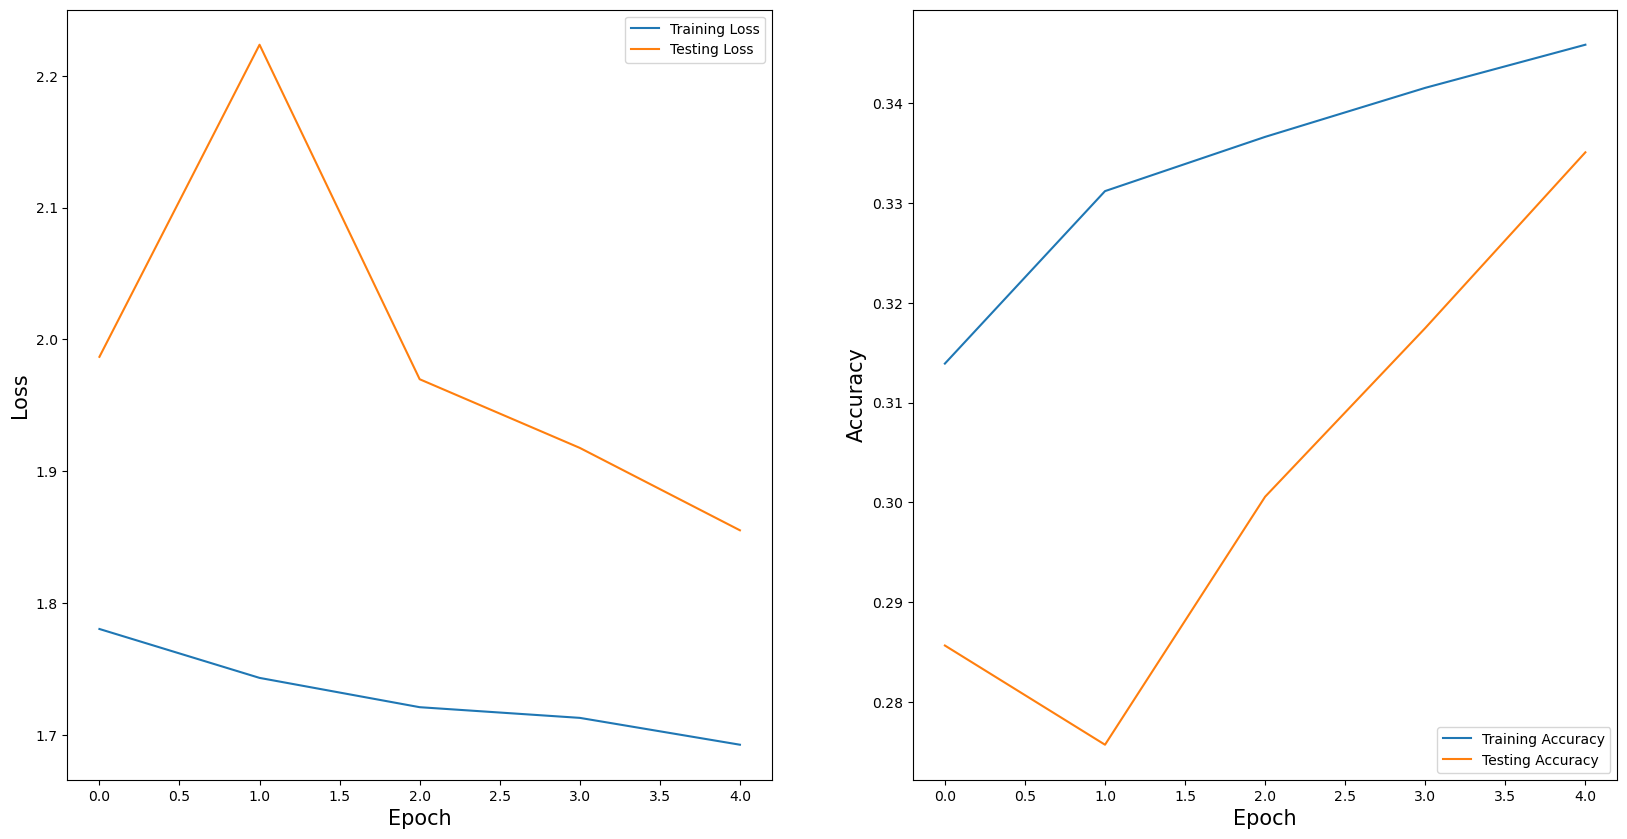

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 184ms/step


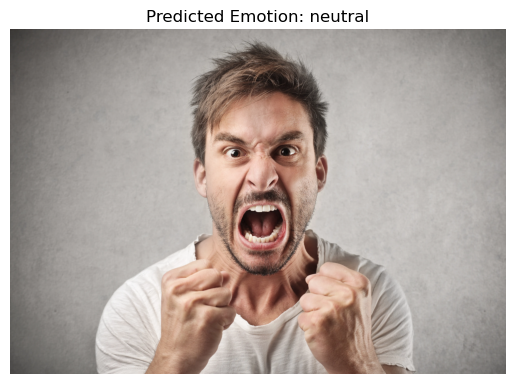

In [15]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

def detect_emotion(image_path, model_path):
    # Load the trained model
    trained_model = load_model(model_path)

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    emotion_probabilities = trained_model.predict(img_array)
    emotion_index = np.argmax(emotion_probabilities)

    # Map the index to the corresponding emotion
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_emotion = emotions[emotion_index]

    # Display the input image with predicted emotion
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

# Example usage:
image_path_to_predict = '/Users/mohammadmujahidnadeem/Downloads/New/Angrym.jpg'
model_path = './emotion_detection_model.h5'
detect_emotion(image_path_to_predict, model_path)


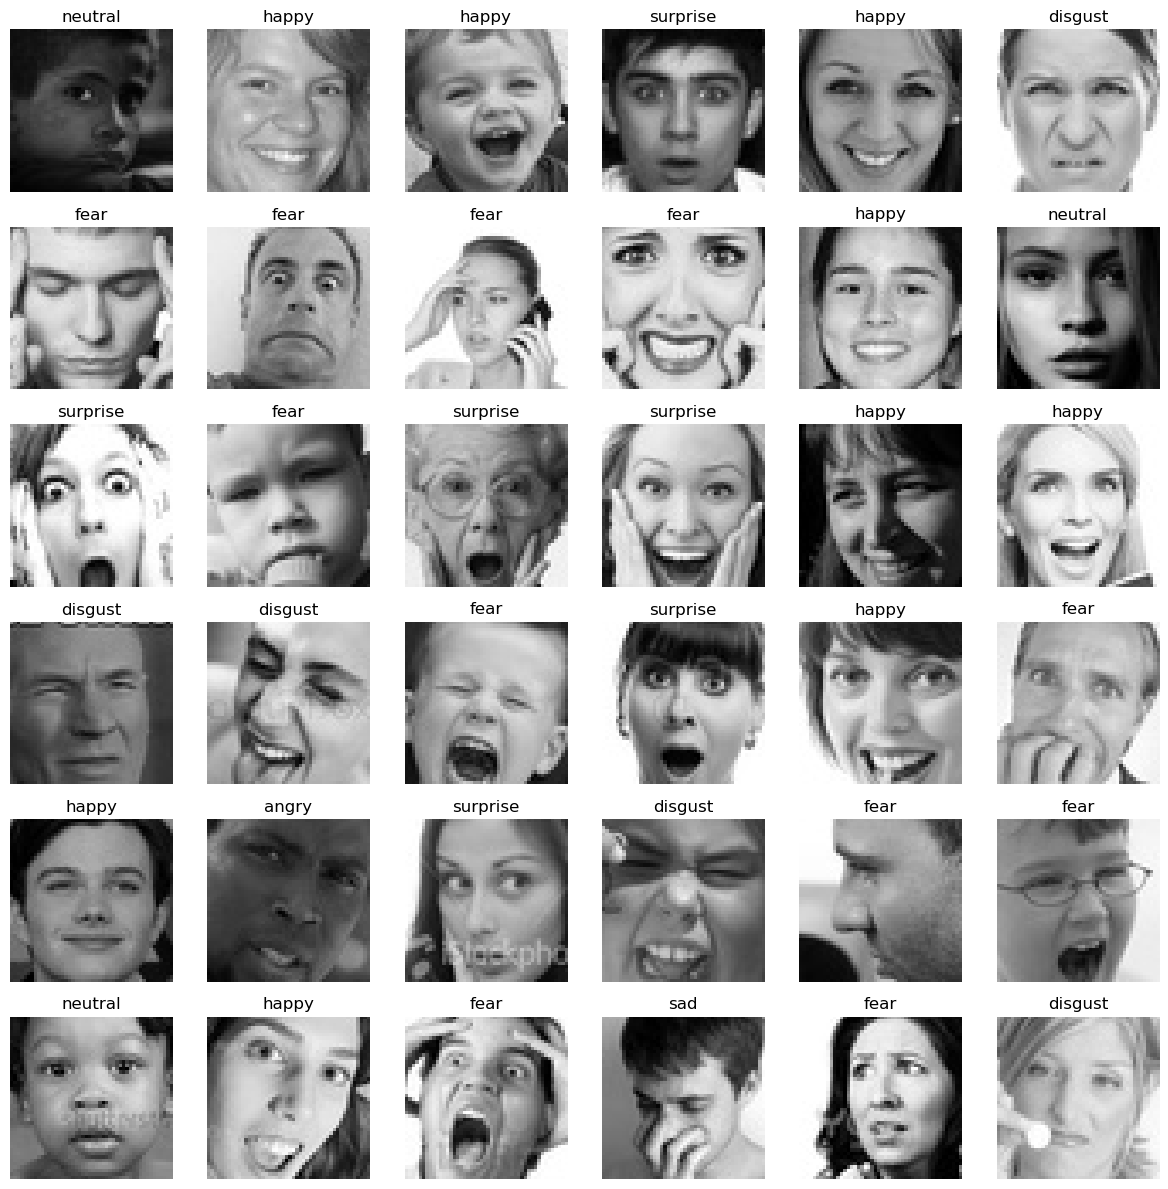

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_30 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_30 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 24, 24, 64)        0         
                                   

KeyboardInterrupt: 

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, BatchNormalization, Reshape, SimpleRNN, LSTM, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

path = '/Users/mohammadmujahidnadeem/Downloads/New/images'
import random

expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
random.shuffle(expressions)

plt.figure(figsize=(12, 12))
index = 1

for i in range(1, 37):
    expression = random.choice(expressions)
    image_path = os.path.join(path, 'train', expression)
    image_files = os.listdir(image_path)
    random.shuffle(image_files)
    image = load_img(os.path.join(image_path, image_files[i]), target_size=(48, 48))
    plt.subplot(6, 6, index)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    index += 1

plt.tight_layout()
plt.show()

batch_size = 128
train_datagenerator = ImageDataGenerator()
validation_datagenerator = ImageDataGenerator()
trainpath = '/Users/mohammadmujahidnadeem/Downloads/New/images/train'
validpath = '/Users/mohammadmujahidnadeem/Downloads/New/images/validation'
train_set = train_datagenerator.flow_from_directory(trainpath,
                                                   target_size=(48, 48), 
                                                   color_mode="grayscale",
                                                   class_mode="categorical", 
                                                   batch_size=batch_size, 
                                                   shuffle=True)
test_set = validation_datagenerator.flow_from_directory(validpath,
                                                       target_size=(48, 48), 
                                                       color_mode="grayscale",
                                                       class_mode="categorical", 
                                                       batch_size=batch_size, 
                                                       shuffle=False)

classes = 7
model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3,3), padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5,5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Reshape for RNN or LSTM
model.add(Reshape((9, 512)))  # Adjust based on the actual output shape

# Add RNN or LSTM layer
model.add(SimpleRNN(64, return_sequences=True))  # RNN layer with return_sequences
model.add(LSTM(64))                              # LSTM layer

# Flatten before fully connected layers
model.add(Flatten())

# 1st connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# 2nd connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

# Use the legacy Adam optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model_checkpoint = ModelCheckpoint("./model.keras", 
                                   monitor="val_accuracy", 
                                   verbose=1, 
                                   save_best_only=True, 
                                   mode="max")

early_stop = EarlyStopping(monitor="val_loss",
                           min_delta=0,
                           patience=3,
                           verbose=1,
                           restore_best_weights=True)

reduce_learning_rate = ReduceLROnPlateau(monitor="val_loss", 
                                         factor=0.2, 
                                         patience=3, 
                                         verbose=1,
                                         min_delta=0.0001)

callbacks_list = [early_stop, model_checkpoint, reduce_learning_rate]
epochs = 5

history = model.fit(train_set, 
                    epochs=epochs, 
                    callbacks=callbacks_list, 
                    validation_data=test_set,
                    steps_per_epoch=train_set.n//train_set.batch_size, 
                    validation_steps=test_set.n//test_set.batch_size)

model.save("./emotion_detection_model.keras")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.legend(loc='lower right')
plt.show()


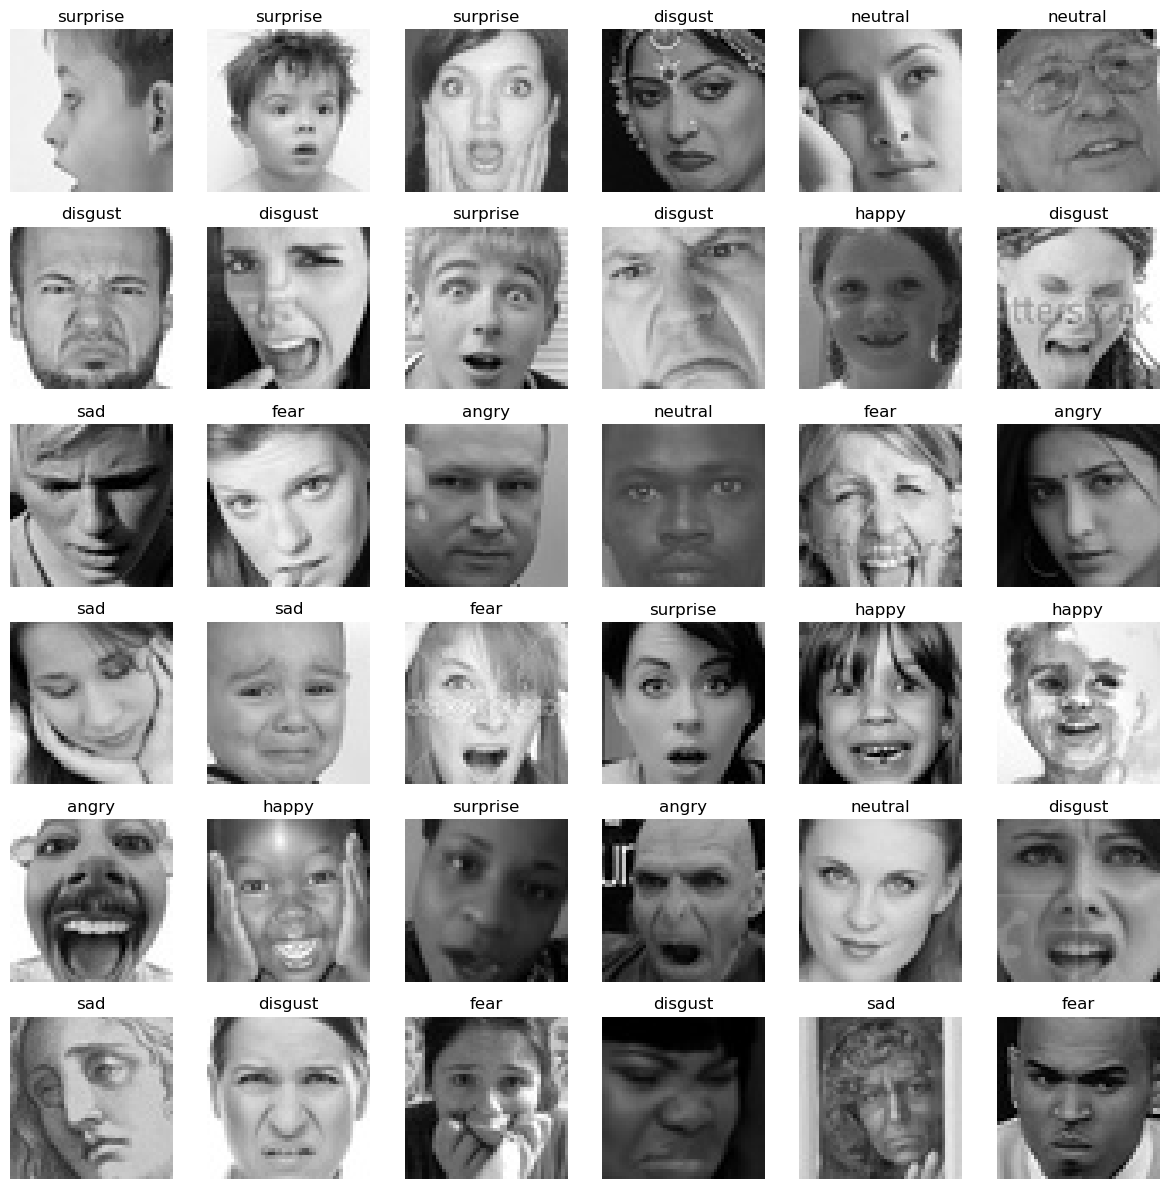

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_48 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_48 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 24, 24, 64)        0         
                                   

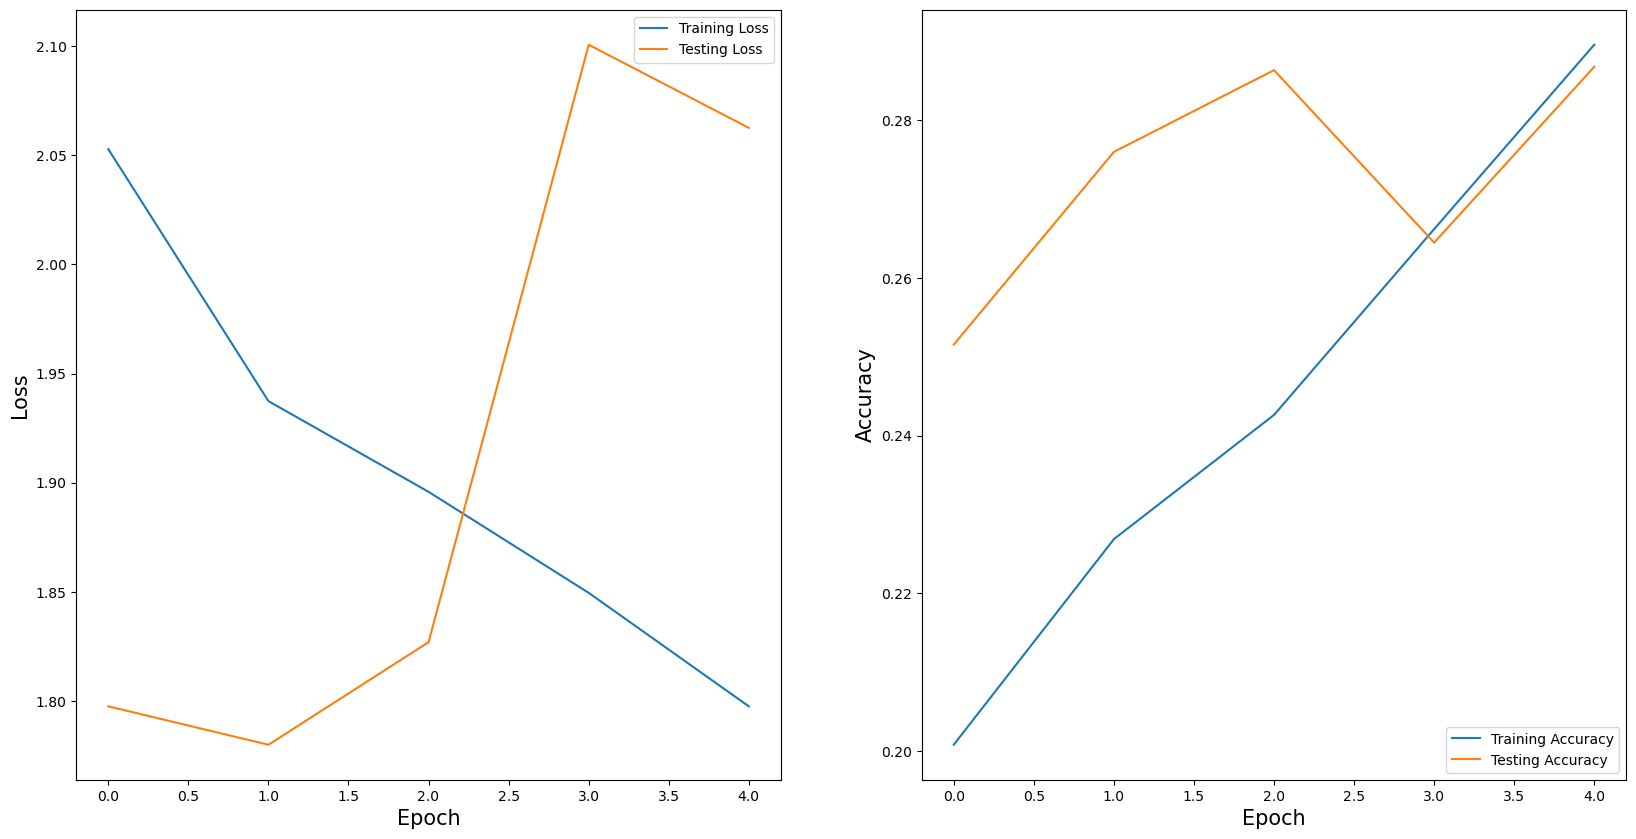

In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, BatchNormalization, Reshape, SimpleRNN, LSTM, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import shuffle

path = '/Users/mohammadmujahidnadeem/Downloads/New/images'

# Shuffle expressions for better diversity in training
expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
random.shuffle(expressions)

plt.figure(figsize=(12, 12))
index = 1

# Display random images from the training set
for i in range(1, 37):
    expression = random.choice(expressions)
    image_path = os.path.join(path, 'train', expression)
    image_files = os.listdir(image_path)
    random.shuffle(image_files)
    image = load_img(os.path.join(image_path, image_files[i]), target_size=(48, 48))
    plt.subplot(6, 6, index)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    index += 1

plt.tight_layout()
plt.show()

batch_size = 128

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

# Load training and validation sets with shuffle
train_set = train_datagen.flow_from_directory(
    trainpath,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True
)

test_set = validation_datagen.flow_from_directory(
    validpath,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=False
)

classes = 7
model = Sequential()

# CNN layers
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Reshape for RNN or LSTM
model.add(Reshape((9, 512)))

# RNN and LSTM layers
model.add(SimpleRNN(64, return_sequences=True))
model.add(LSTM(64))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

# Use the legacy Adam optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model_checkpoint = ModelCheckpoint("./model.h5",
                                   monitor="val_accuracy",
                                   verbose=1,
                                   save_best_only=True,
                                   mode="max")

early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stop, model_checkpoint, reduce_learning_rate]
epochs = 5  # Increase the number of epochs for better training

history = model.fit(
    train_set,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=test_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    validation_steps=test_set.n // test_set.batch_size
)

model.save("./emotion_detection_model.h5")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.legend(loc='lower right')
plt.show()


1/1 [==============================] - 0s 187ms/step


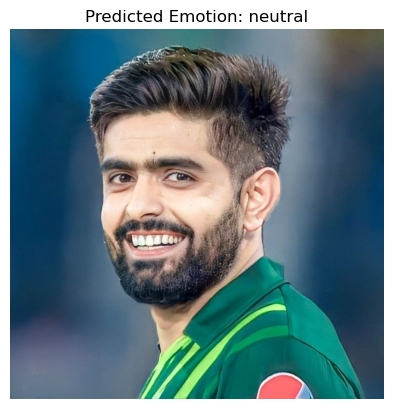

In [27]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

def detect_emotion(image_path, model_path):
    # Load the trained model
    trained_model = load_model(model_path)

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    emotion_probabilities = trained_model.predict(img_array)
    emotion_index = np.argmax(emotion_probabilities)

    # Map the index to the corresponding emotion
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_emotion = emotions[emotion_index]

    # Display the input image with predicted emotion
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

# Example usage:
image_path_to_predict = '/Users/mohammadmujahidnadeem/Downloads/New/babar.jpg'
model_path = './emotion_detection_model.h5'
detect_emotion(image_path_to_predict, model_path)


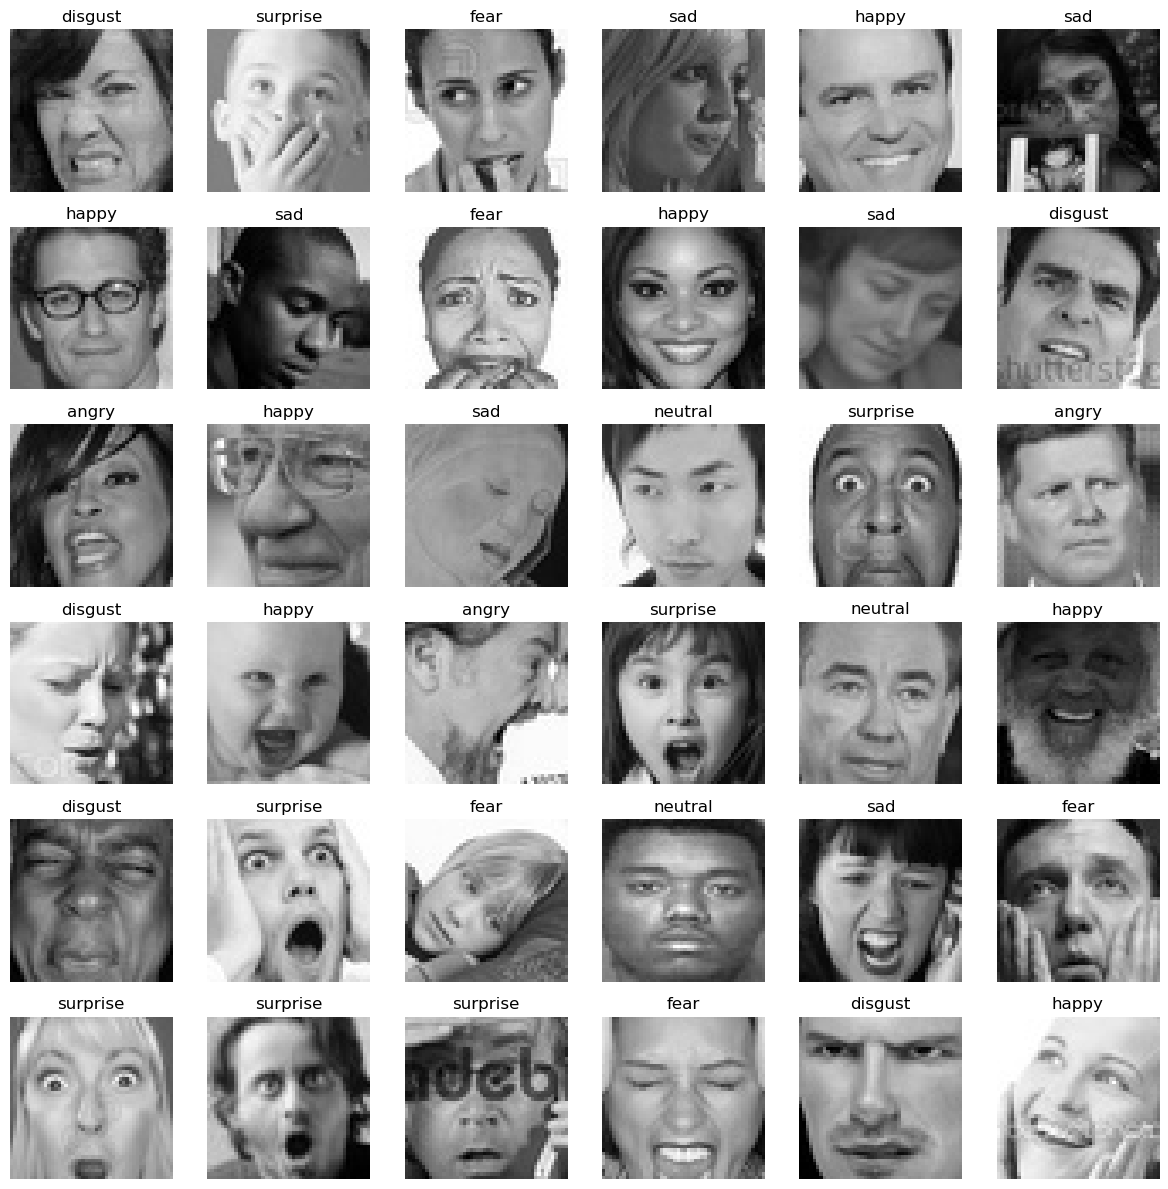

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_54 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_54 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 24, 24, 64)        0         
                                   

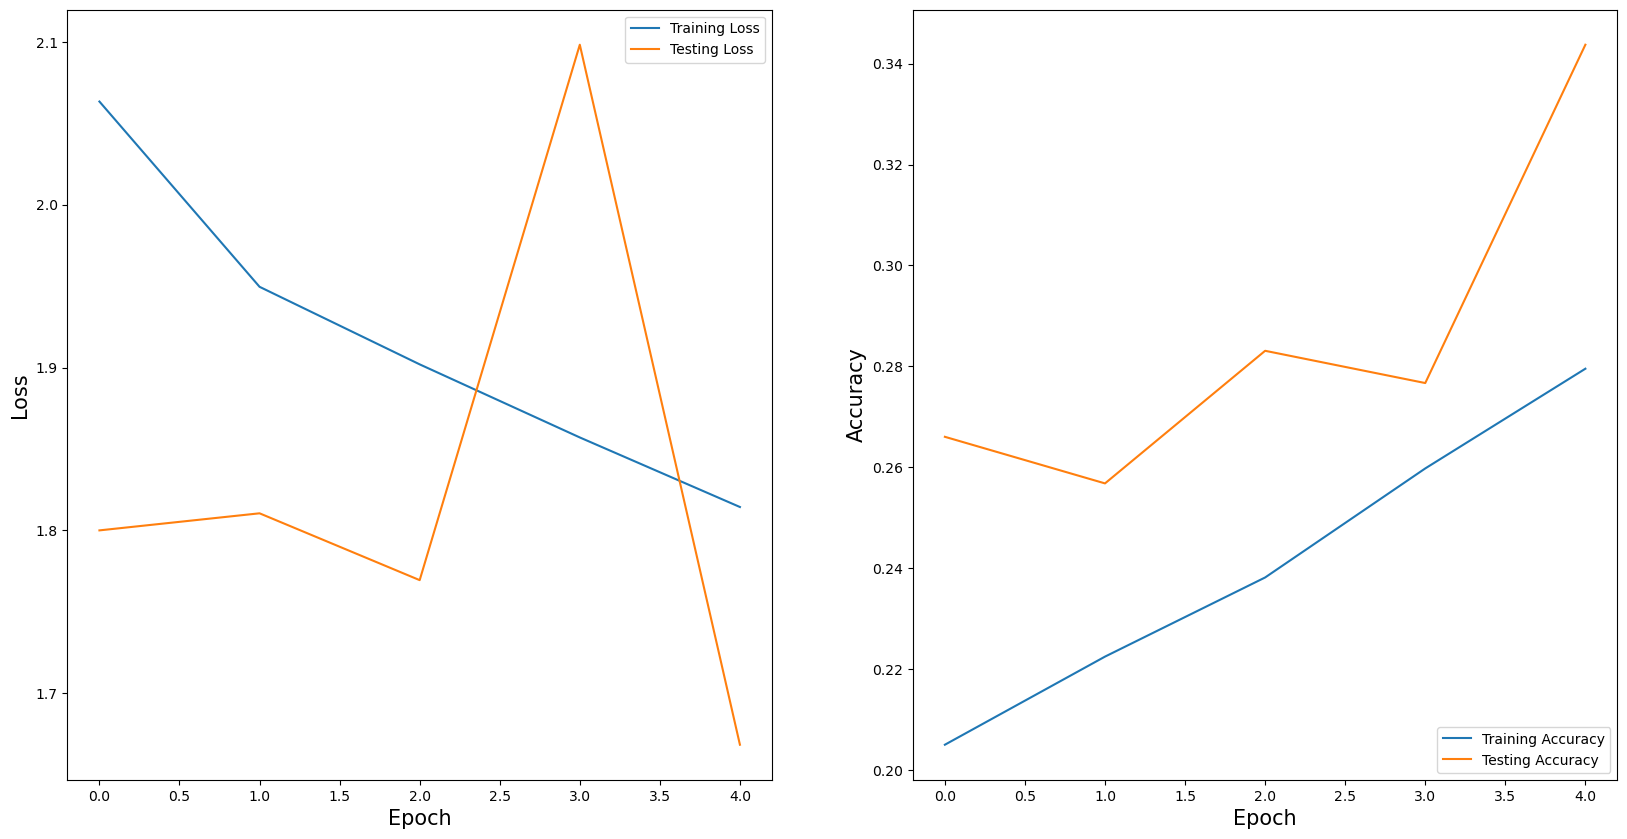

In [29]:

import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, BatchNormalization, Reshape, SimpleRNN, LSTM, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import shuffle

path = '/Users/mohammadmujahidnadeem/Downloads/New/images'

# Shuffle expressions for better diversity in training
expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
random.shuffle(expressions)

plt.figure(figsize=(12, 12))
index = 1

# Display random images from the training set
for i in range(1, 37):
    expression = random.choice(expressions)
    image_path = os.path.join(path, 'train', expression)
    image_files = os.listdir(image_path)
    random.shuffle(image_files)
    image = load_img(os.path.join(image_path, image_files[i]), target_size=(48, 48))
    plt.subplot(6, 6, index)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    index += 1

plt.tight_layout()
plt.show()

batch_size = 128

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

# Load training and validation sets with shuffle
train_set = train_datagen.flow_from_directory(
    trainpath,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True
)

test_set = validation_datagen.flow_from_directory(
    validpath,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=False
)

classes = 7
model = Sequential()

# CNN layers
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Reshape for RNN or LSTM
model.add(Reshape((9, 512)))

# RNN and LSTM layers
model.add(SimpleRNN(64, return_sequences=True))
model.add(LSTM(64))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

# Use the legacy Adam optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model_checkpoint = ModelCheckpoint("./model.h5",
                                   monitor="val_accuracy",
                                   verbose=1,
                                   save_best_only=True,
                                   mode="max")

early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stop, model_checkpoint, reduce_learning_rate]
epochs = 5  # Increase the number of epochs for better training

history = model.fit(
    train_set,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=test_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    validation_steps=test_set.n // test_set.batch_size
)

model.save("./emotion_detection_model.h5")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.legend(loc='lower right')
plt.show()


# Load the trained model
model.load_weights("./model.h5")

# Function to preprocess the image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(48, 48), grayscale=True)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
    return img_array

# Function to capture real-time images from the camera and detect emotions
def detect_emotions():
    # Open a connection to the camera (camera index 0 by default)
    cap = cv2.VideoCapture(0)

    while True:
        # Capture a single frame
        ret, frame = cap.read()

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Resize the frame to match the model's expected sizing
        frame = cv2.resize(gray, (48, 48))

        # Convert the frame to an array
        img_array = img_to_array(frame)
        img_array = np.expand_dims(img_array, axis=0)

        # Make predictions on the emotion
        predictions = model.predict(img_array)

        # Get the emotion label with the highest probability
        predicted_emotion = expressions[np.argmax(predictions)]

        # Display the emotion

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

def detect_emotion(image_path, model_path):
    # Load the trained model
    trained_model = load_model(model_path)

    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    emotion_probabilities = trained_model.predict(img_array)
    emotion_index = np.argmax(emotion_probabilities)

    # Map the index to the corresponding emotion
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_emotion = emotions[emotion_index]

    # Display the input image with predicted emotion
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

# Example usage:
image_path_to_predict = '/Users/mohammadmujahidnadeem/Downloads/New/babar.jpg'
model_path = './emotion_detection_model.h5'
detect_emotion(image_path_to_predict, model_path)


In [2]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def detect_emotion(image_paths, model_path):
    # Load the trained model
    trained_model = load_model(model_path)

    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    for image_path in image_paths:
        # Load and preprocess the input image
        img = image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Make prediction
        emotion_probabilities = trained_model.predict(img_array)
        emotion_index = np.argmax(emotion_probabilities)

        # Map the index to the corresponding emotion
        predicted_emotion = emotions[emotion_index]

        # Display the input image with predicted emotion
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted Emotion: {predicted_emotion}')
        plt.axis('off')
        plt.show()

# Example usage:
path1 = '/Users/mohammadmujahidnadeem/Downloads/New/imran.jpg'
path2 = '/Users/mohammadmujahidnadeem/Downloads/New/babar.jpg'
path3 = '/Users/mohammadmujahidnadeem/Downloads/New/immi.jpg'

image_paths_to_predict = ['/path/to/image1.jpg', '/path/to/image2.jpg', '/path/to/image3.jpg']
model_path = './emotion_detection_model.h5'
detect_emotion(image_paths_to_predict, model_path)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/image1.jpg'